# Semantic Segmentation

This notebook demonstrates semantic segmentation using Panda's fine-tuned model. Semantic segmentation assigns each point a class label based on its topological type (motif).

**Motif Classes:**
| ID | Class | Description |
|----|-------|-------------|
| 0 | Shower | Electromagnetic shower |
| 1 | Track | Minimum ionizing particle track |
| 2 | Michel | Michel electron from muon decay |
| 3 | Delta | Delta ray (knock-on electron) |
| 4 | LED | Low energy deposit |

## 1. Load Data


In [1]:
import panda
import numpy as np

# auto-download from HuggingFace (or use local data_root if available)
dataset = panda.PILArNetH5Dataset(split="test", energy_threshold=0.13)

data = dataset[np.random.randint(0, len(dataset))]
for k in data.keys():
    data[k] = data[k].cuda(non_blocking=True)

In [2]:
print("\n".join(data.keys()))

coord
grid_coord
instance_particle
instance_interaction
energy
segment_particle
segment_motif
segment_interaction
offset
feat


## 2. Load Model & Run Inference

The `semantic` model is the base encoder with a semantic segmentation head. Output contains `seg_logits` with shape `(N, num_classes)`.


In [3]:
import torch

# load in model
model = panda.load("semantic").cuda()
# run inference
with torch.no_grad(), torch.inference_mode():
    output = model(data)

## 3. Visualize Results

Compare predicted semantic labels against ground truth.


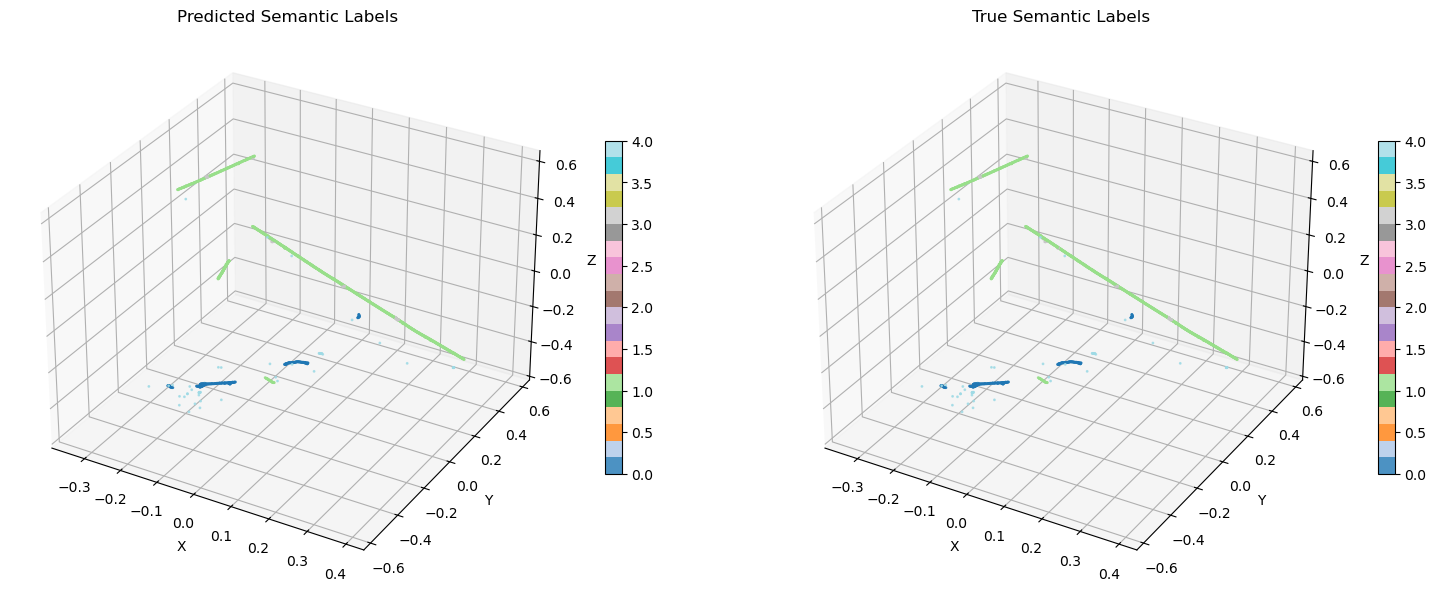

In [5]:
import matplotlib.pyplot as plt

coords = data['coord'].cpu().numpy()
semantic_pred = output["seg_logits"].argmax(dim=1).cpu().numpy()
semantic_true = data['segment_motif'].squeeze(-1).cpu().numpy()

fig = plt.figure(figsize=(16, 6))

# predicted labels
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
sc_pred = ax1.scatter(
    coords[:, 0],
    coords[:, 1],
    coords[:, 2],
    c=semantic_pred,
    cmap="tab20",
    s=1,
    alpha=0.8,
)
ax1.set_title('Predicted Semantic Labels')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
fig.colorbar(sc_pred, ax=ax1, shrink=0.6)

# ground truth labels
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
sc_true = ax2.scatter(
    coords[:, 0],
    coords[:, 1],
    coords[:, 2],
    c=semantic_true,
    cmap="tab20",
    s=1,
    alpha=0.8,
)
ax2.set_title('True Semantic Labels')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
fig.colorbar(sc_true, ax=ax2, shrink=0.6)

plt.tight_layout()
plt.show()